# Exploring & Machine Learning for Airbnb Listings in Toronto

Airbnb does not provide open data in the sense of giant databases or dumps that we can work with. However, Inside Airbnb utilizes public information compiled from the Airbnb web-site and analyzes publicly available information about a city's Airbnb's listings, and provides filters and key metrics so we can see how Airbnb is being used in the major cities around the world. Inside Airbnb is an independent, non-commercial set of tools and data that is not associated with or endorsed by Airbnb or any of Airbnb's competitors.

However, the information provided by Inside Airbnb isn't going to be enough for us. We are going to download data from there for our own analysis. 

I will be working with Toronto data. Because I live here and I know some of the neighborhoods here. You are welcome to choose any city you prefer.

We are going to look at Airbnb listings and calendars, and trying to provide some exploratory analysis around predicting listing prices, both for, if we were hypothetically working at Airbnb, and also for a consumer.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [52]:
reviews = pd.read_csv('./data_toronto/reviews.csv')
calendar = pd.read_csv('./data_toronto/calendar.csv')
listings = pd.read_csv('./data_toronto/listings.csv')

/Users/ddl/anaconda3/envs/datascience/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (61,62,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Calender

How busy is it for Airbnb hosts in Toronto?

In [53]:

print('We have', calendar.date.nunique(), 'days and', calendar.listing_id.nunique(), 'unique listings in the calendar data.')

We have 366 days and 23397 unique listings in the calendar data.


In [54]:
calendar.date.min(), calendar.date.max()

('2019-12-07', '2020-12-06')

Calendar data covers one year time frame, that is, price and availability every day for the next one year.

In [55]:
calendar.isnull().sum()

listing_id         0
date               0
available          0
price              0
adjusted_price     0
minimum_nights    42
maximum_nights    42
dtype: int64

In [56]:
calendar.shape

(8539992, 7)

In [57]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,291699,2019-12-08,t,$34.00,$34.00,80.0,90.0
1,1419,2019-12-08,f,$469.00,$469.00,4.0,730.0
2,1419,2019-12-09,f,$469.00,$469.00,4.0,730.0
3,1419,2019-12-10,f,$469.00,$469.00,4.0,730.0
4,1419,2019-12-11,f,$469.00,$469.00,4.0,730.0


In [58]:
calendar.available.value_counts()

f    5472713
t    3067279
Name: available, dtype: int64

f (false) means not available, t(true) means available.

Find out daily average availability for one year. Convert available column to 0 if available and 1 if not.

In [59]:
calendar_new = calendar[['date', 'available']]
calendar_new['busy'] = calendar_new.available.map( lambda x: 0 if x == 't' else 1)
calendar_new = calendar_new.groupby('date')['busy'].mean().reset_index()
calendar_new['date'] = pd.to_datetime(calendar_new['date'])

/Users/ddl/anaconda3/envs/datascience/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


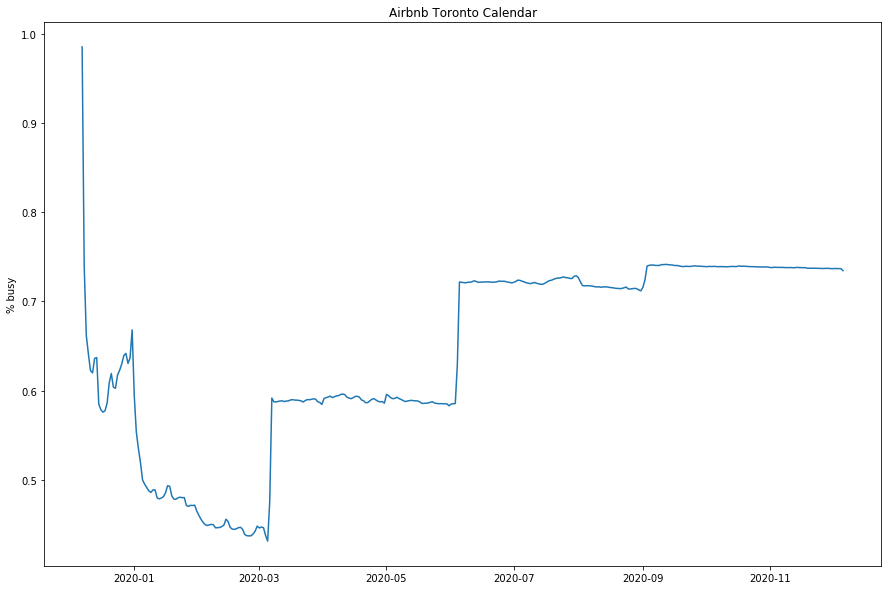

In [113]:
#plt.figure(figsize=(15,10))

plt.rc('figure', figsize=(15, 10))
plt.plot(calendar_new['date'], calendar_new['busy'])
plt.title('Airbnb Toronto Calendar')
plt.ylabel('% busy')
plt.show();

The busiest month in Toronto was Oct which has just passed.The next busy months seems after April and extend to the summer. These are all within our experience and expectations.

In [61]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,291699,2019-12-08,t,$34.00,$34.00,80.0,90.0
1,1419,2019-12-08,f,$469.00,$469.00,4.0,730.0
2,1419,2019-12-09,f,$469.00,$469.00,4.0,730.0
3,1419,2019-12-10,f,$469.00,$469.00,4.0,730.0
4,1419,2019-12-11,f,$469.00,$469.00,4.0,730.0


### Price on the Calendar

How prices change over the year by month?

In [62]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,291699,2019-12-08,t,$34.00,$34.00,80.0,90.0
1,1419,2019-12-08,f,$469.00,$469.00,4.0,730.0
2,1419,2019-12-09,f,$469.00,$469.00,4.0,730.0
3,1419,2019-12-10,f,$469.00,$469.00,4.0,730.0
4,1419,2019-12-11,f,$469.00,$469.00,4.0,730.0


Remove "$" symbol in price column and convert it to numeric, and convert date to datetime data type.

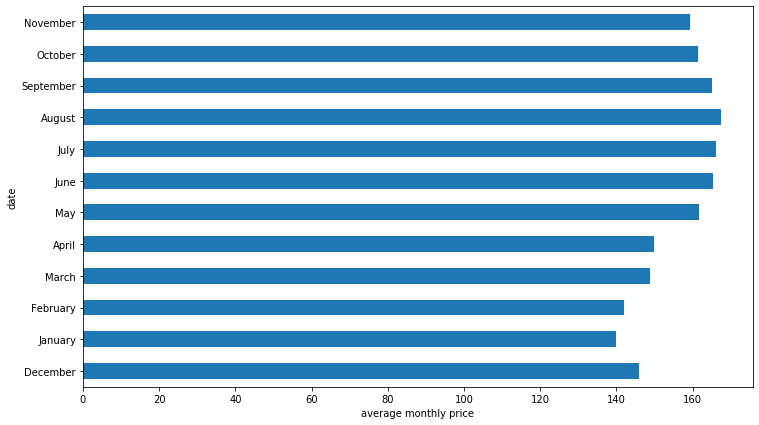

In [63]:
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['price'] = calendar['price'].str.replace(',', '')
calendar['price'] = calendar['price'].str.replace('$', '')
calendar['price'] = calendar['price'].astype(float)
calendar['date'] = pd.to_datetime(calendar['date'])
mean_of_month = calendar.groupby(calendar['date'].dt.strftime('%B'),
                                 sort=False)['price'].mean()
mean_of_month.plot(kind = 'barh' , figsize = (12,7))
plt.xlabel('average monthly price');

The Airbnb price in Toronto increases in the months of July, August and October. Agreed, these three months are the best months visiting Toronto.

How price changes during day of week?

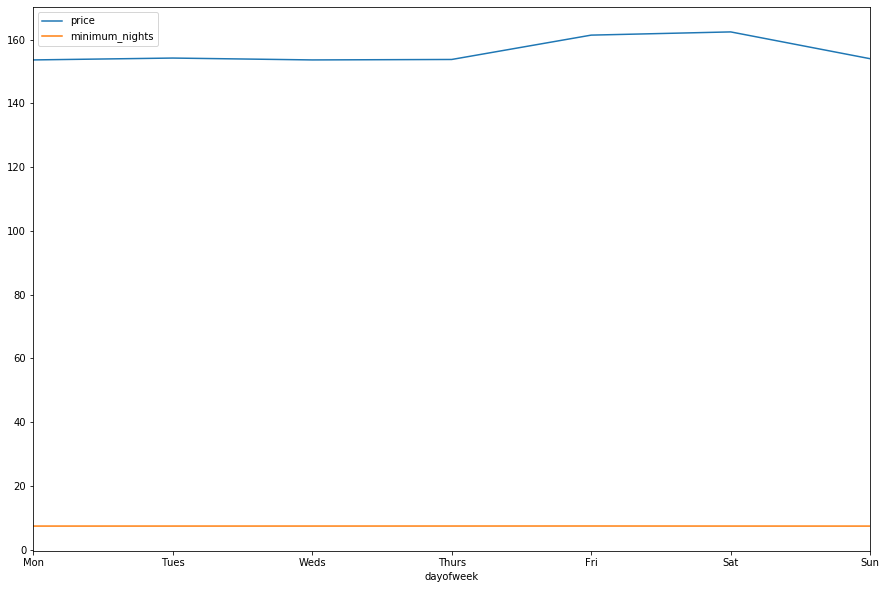

In [115]:
calendar['dayofweek'] = calendar.date.dt.weekday_name
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
price_week=calendar[['dayofweek','price']]
price_week = calendar.groupby(['dayofweek']).mean().reindex(cats)
price_week.head()

price_week.drop('listing_id', axis=1, inplace=True)
price_week.drop('maximum_nights', axis=1, inplace=True)
#price_week.plot(figsize=(20,12))
price_week.plot()
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels);

Fridays and Saturdays are over $10 more expensive than the rest of the week.

### Listings

#### Number of listings in each neighbourhood

In [78]:

print('We have', listings.id.nunique(), 'listings in the listing data.')

We have 23397 listings in the listing data.


In [79]:
listings.groupby(by='neighbourhood_cleansed').count()[['id']].sort_values(by='id', ascending=False).head(10)

,id
neighbourhood_cleansed,
Waterfront Communities-The Island,4375
Niagara,1048
Annex,851
Church-Yonge Corridor,722
Bay Street Corridor,686
Dovercourt-Wallace Emerson-Junction,635
Willowdale East,628
Kensington-Chinatown,596
Moss Park,564


The neighbourhood that has the highest number of listings is Waterfront Communities-The Island, and almost four times more than the second most neighbourhood (Niagara). From map at Inside Airbnb, we can see that too.

### review score rating

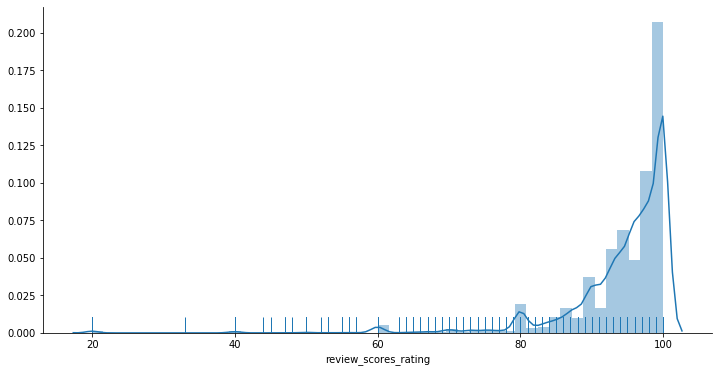

In [116]:
plt.figure(figsize=(12,6))
sns.distplot(listings.review_scores_rating.dropna(), rug=True)
sns.despine()
plt.show();

In [96]:
listings.review_scores_rating.describe()
listings.price.dtypes


dtype('float64')

As expected, most of reviewers leave high scores.

### Exploring the price

In [97]:
#listings['price'] = listings['price'].str.replace(',', '')
#listings['price'] = listings['price'].str.replace('$', '')
#listings['price'] = listings['price'].astype(float)

listings['price'].describe()

count    23397.000000
mean       148.707099
std        329.417941
min          0.000000
25%         65.000000
50%         99.000000
75%        160.000000
max      13255.000000
Name: price, dtype: float64

The most expensive Airbnb listing in Toronto is at $12933/night. From the listing url, it seems legitimate as far as I can tell.
https://www.airbnb.ca/rooms/16039481?locale=en. An Art Collector's Penthouse in Toronto's most stylish neighbourhood.

In [98]:
listings.iloc[np.argmax(listings['price'])]

/Users/ddl/anaconda3/envs/datascience/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


id                                                                           16039481
listing_url                                     https://www.airbnb.com/rooms/16039481
scrape_id                                                              20191207213017
last_scraped                                                               2019-12-08
name                                                        Art Collector's Penthouse
                                                                ...                  
calculated_host_listings_count                                                      1
calculated_host_listings_count_entire_homes                                         1
calculated_host_listings_count_private_rooms                                        0
calculated_host_listings_count_shared_rooms                                         0
reviews_per_month                                                                 NaN
Name: 5778, Length: 106, dtype: object

I decided to remove listings that exceed $600/night, as well as 7 listings at price 0, for the following exploratory analysis.

In [99]:
listings.loc[listings['price'] > 600]['price'].describe()

count      366.000000
mean      1534.871585
std       2113.176611
min        607.000000
25%        779.000000
50%        999.000000
75%        999.000000
max      13255.000000
Name: price, dtype: float64

In [100]:
listings.loc[listings['price'] == 0]['price'].count()

4

#### Listings price distribution after removing outliers

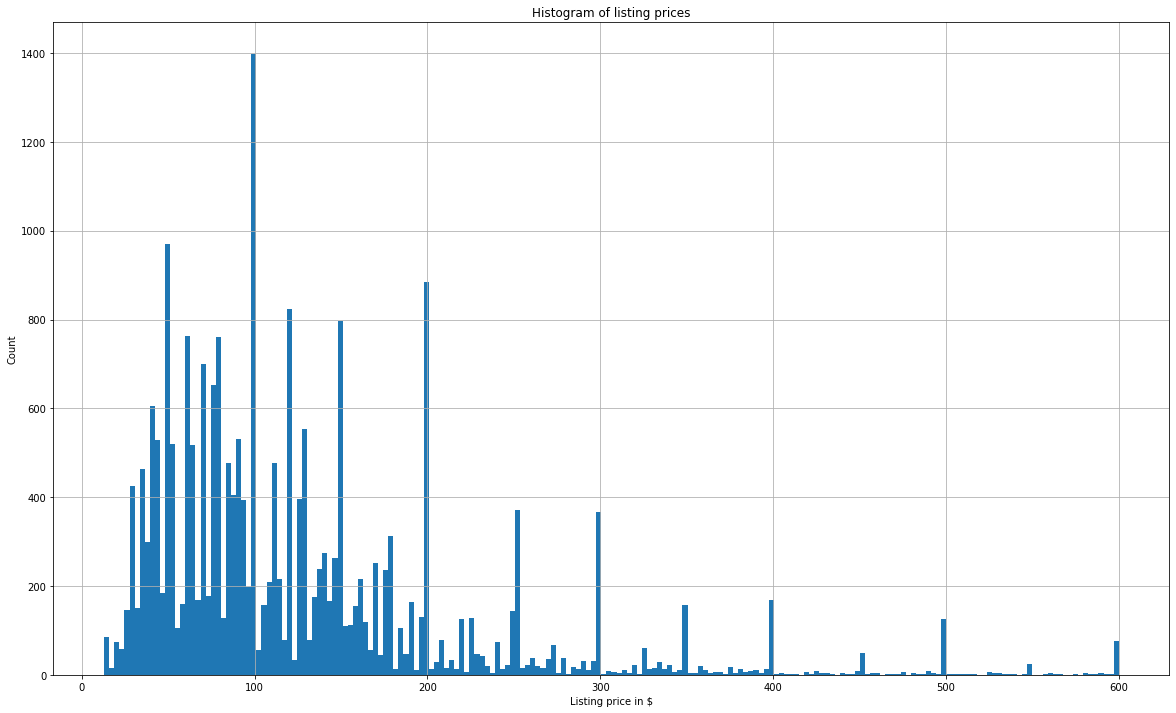

In [101]:

plt.figure(figsize=(20,12))
listings.loc[(listings.price <= 600) & (listings.price > 0)].price.hist(bins=200)


plt.ylabel('Count')
plt.xlabel('Listing price in $')
plt.title('Histogram of listing prices');

#### Neighbourhood vs. Price

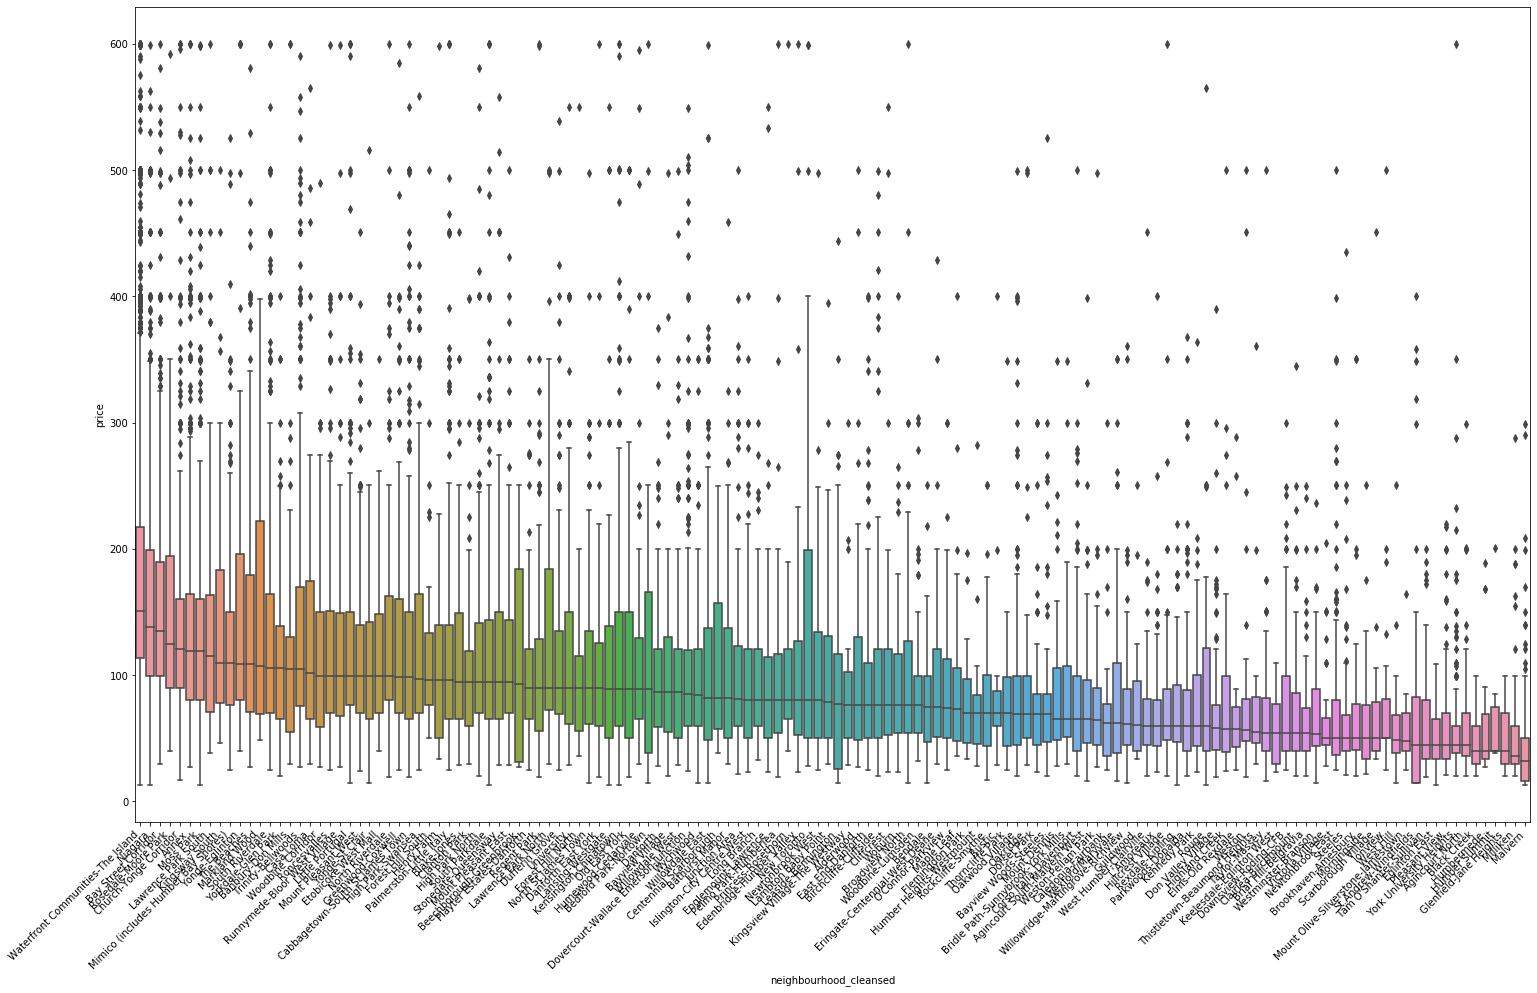

In [102]:
plt.figure(figsize=(25,15))
sort_price = listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                    .groupby('neighbourhood_cleansed')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='neighbourhood_cleansed', data=listings.loc[(listings.price <= 600) & (listings.price > 0)], 
            order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

Not only Waterfront Communities-The Island has the highest number of listings, it also enjoys the highest median price, and Milliken has the lowest median price.

#### host vs. price

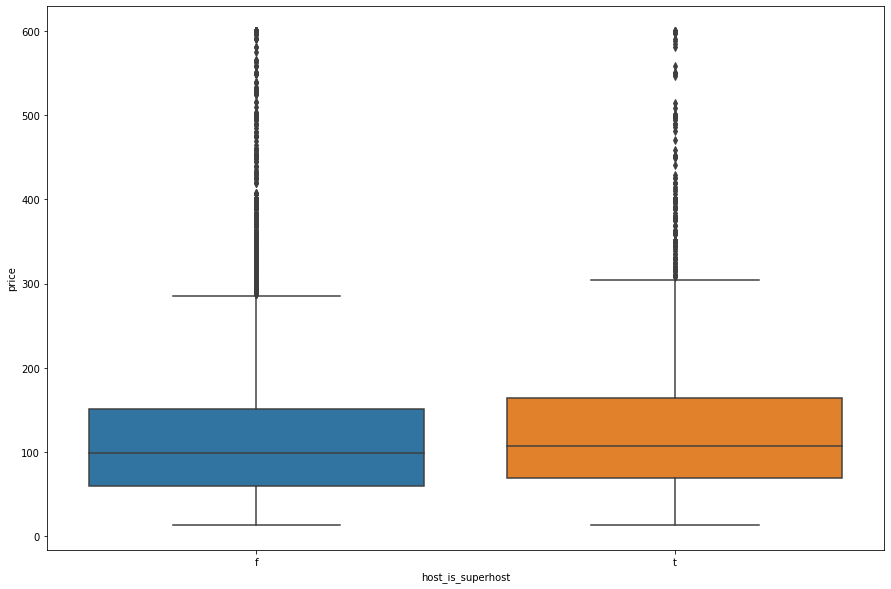

In [117]:
sns.boxplot(y='price', x='host_is_superhost', data=listings.loc[(listings.price <= 600) & (listings.price > 0)])
plt.show();

Super host does enjoy a little higher median price than normal host.

#### property type vs. price

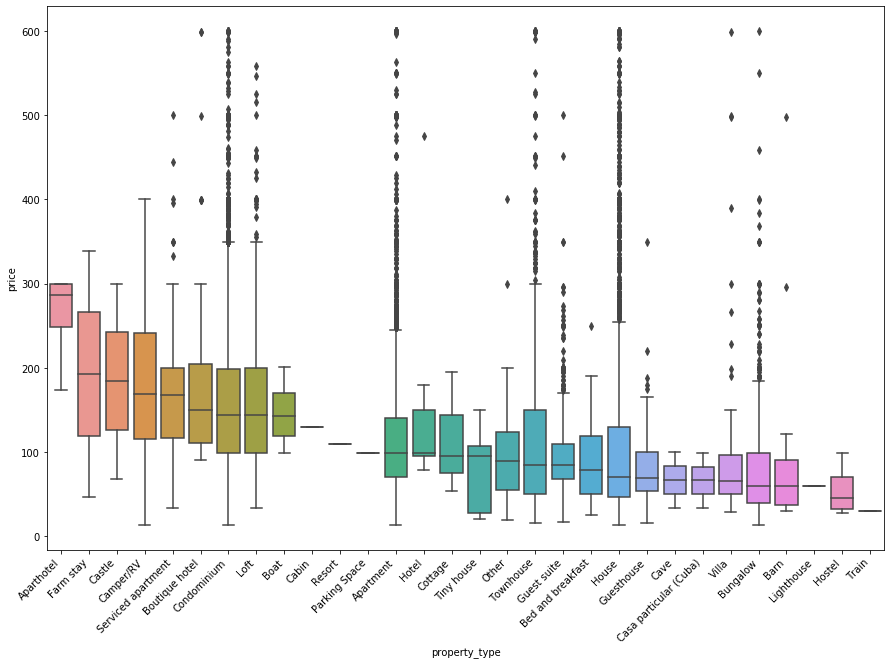

In [118]:
sort_price = listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                    .groupby('property_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='property_type', data=listings.loc[(listings.price <= 600) & (listings.price > 0)], order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

When we look at the median price for each property type, we have to be careful that we can't say "The most expensive property type is Aparthotel, and that Tent and Parking Space have a higher median price than Apartment and Castle.", because Aparthotel, tend and parking space has only one listing each.

In [119]:
listings.property_type.value_counts()

Apartment                 6732
Condominium               6545
House                     6166
Townhouse                 1057
Guest suite                979
Bungalow                   812
Loft                       462
Guesthouse                 129
Serviced apartment         120
Villa                      105
Boutique hotel             102
Other                       47
Bed and breakfast           40
Hostel                      23
Hotel                       22
Barn                        11
Tiny house                  11
Cottage                      9
Boat                         4
Aparthotel                   4
Camper/RV                    4
Castle                       2
Farm stay                    2
Casa particular (Cuba)       2
Cave                         2
Lighthouse                   1
Parking Space                1
Train                        1
Resort                       1
Cabin                        1
Name: property_type, dtype: int64

#### room type vs. price

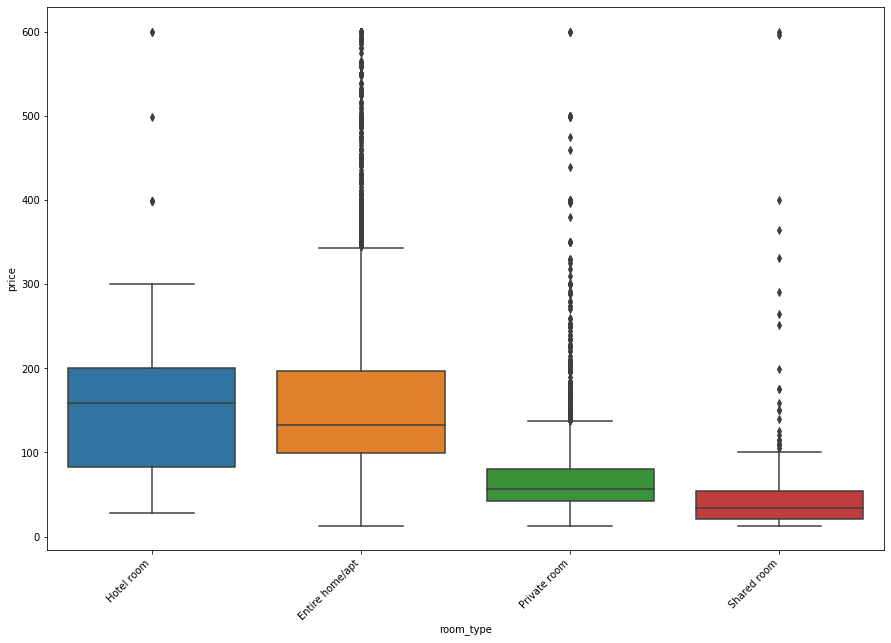

In [120]:
sort_price = listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                    .groupby('room_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='room_type', data=listings.loc[(listings.price <= 600) & (listings.price > 0)], order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

This goes without saying, entire room/apt has a a much higher median price than the other room types.

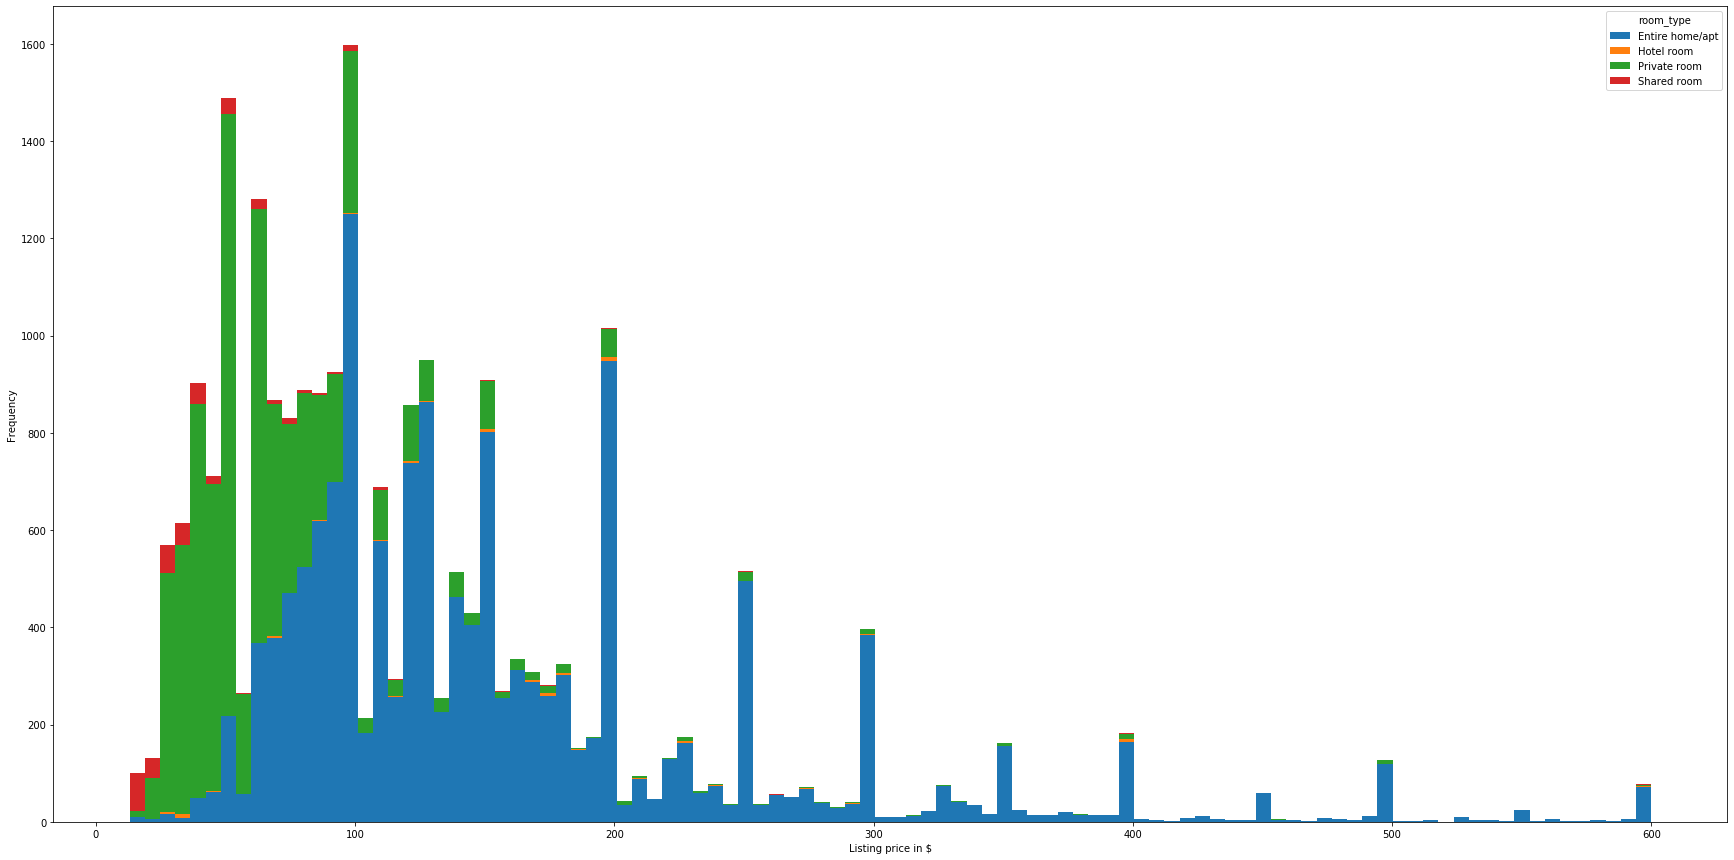

In [121]:

listings.loc[(listings.price <= 600) & (listings.price > 0)].pivot(columns = 'room_type', values = 'price').plot.hist(stacked = True, bins=100, figsize=(30,15))
plt.xlabel('Listing price in $');

Entire home/apt also has the most number of listings. Inside Airbnb has indicated that Entire homes or apartments highly available year-round for tourists, probably don't have the owner present, could be illegal, and more importantly, are displacing residents. We will put our worries away for the moment.

#### bed type vs. price

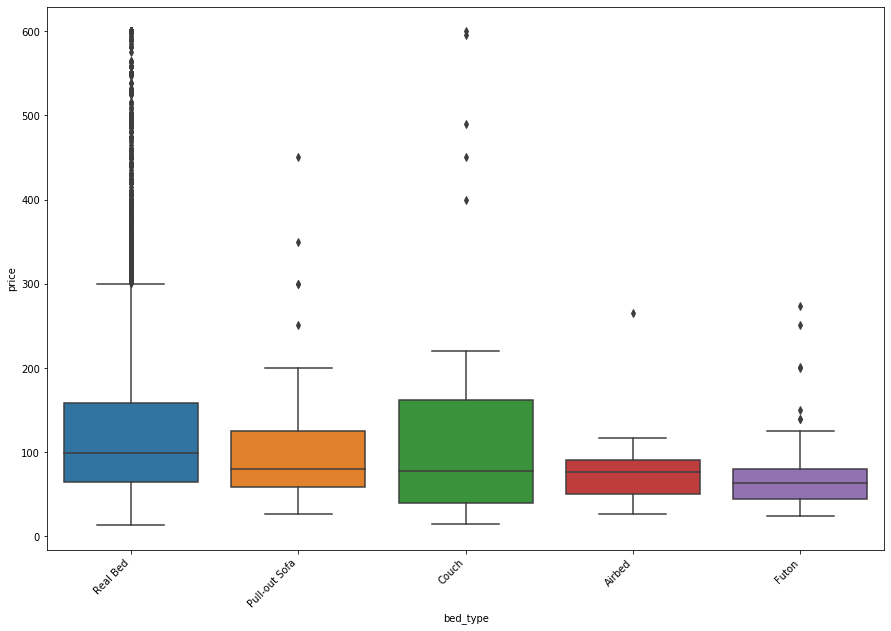

In [122]:
sort_price = listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                    .groupby('bed_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='bed_type', data=listings.loc[(listings.price <= 600) & (listings.price > 0)], order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

There is no surprise.

#### Amenities

The amenities text field needs some cleaning.

In [123]:
listings.amenities = listings.amenities.str.replace("[{}]", "").str.replace('"', "")

In [124]:
listings['amenities'].head()

0    TV,Internet,Wifi,Air conditioning,Kitchen,Indo...
1    TV,Cable TV,Internet,Wifi,Air conditioning,Poo...
2    Internet,Wifi,Pets live on this property,Cat(s...
3    Internet,Wifi,Air conditioning,Kitchen,Free pa...
4    TV,Cable TV,Internet,Wifi,Air conditioning,Whe...
Name: amenities, dtype: object

#### Top 20 most common amenities

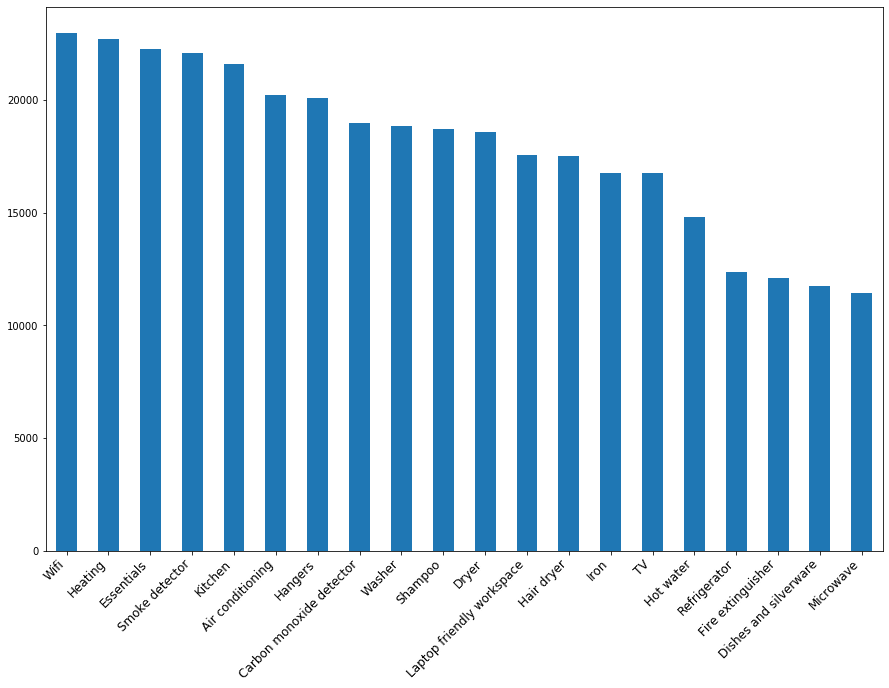

In [125]:
pd.Series(np.concatenate(listings['amenities'].map(lambda amns: amns.split(","))))\
    .value_counts().head(20)\
    .plot(kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.show();

Wifi, heating, essential, kitchen and smoke detector etc are among the most common amenities.

#### Amenities vs. price top 20

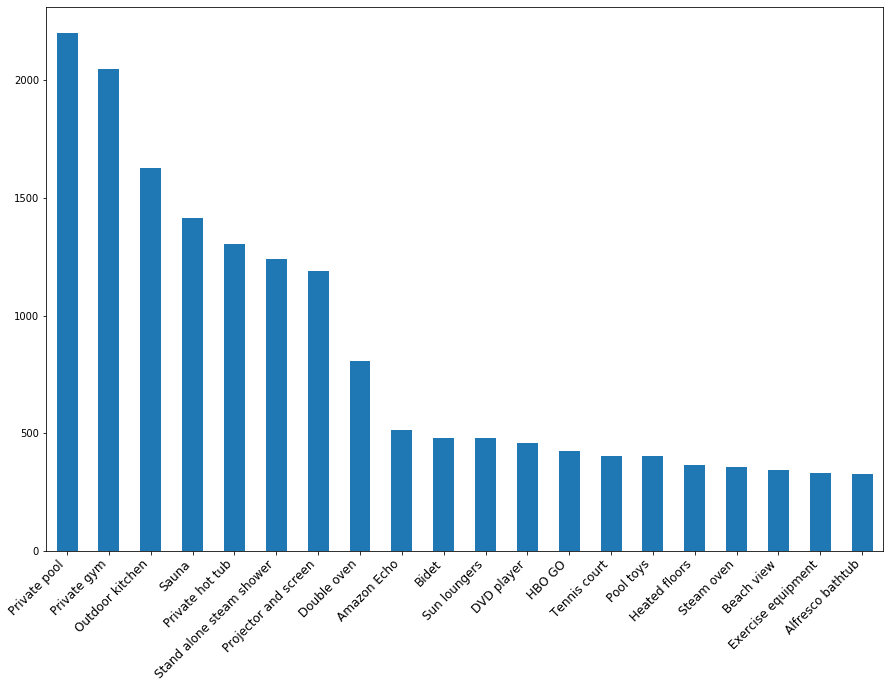

In [126]:
amenities = np.unique(np.concatenate(listings['amenities'].map(lambda amns: amns.split(","))))
amenity_prices = [(amn, listings[listings['amenities'].map(lambda amns: amn in amns)]['price'].mean()) for amn in amenities if amn != ""]
amenity_srs = pd.Series(data=[a[1] for a in amenity_prices], index=[a[0] for a in amenity_prices])

amenity_srs.sort_values(ascending=False)[:20].plot(kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.show();

Interesting, amenities feature does seem to have some relationship with price.

#### Number of beds vs. price

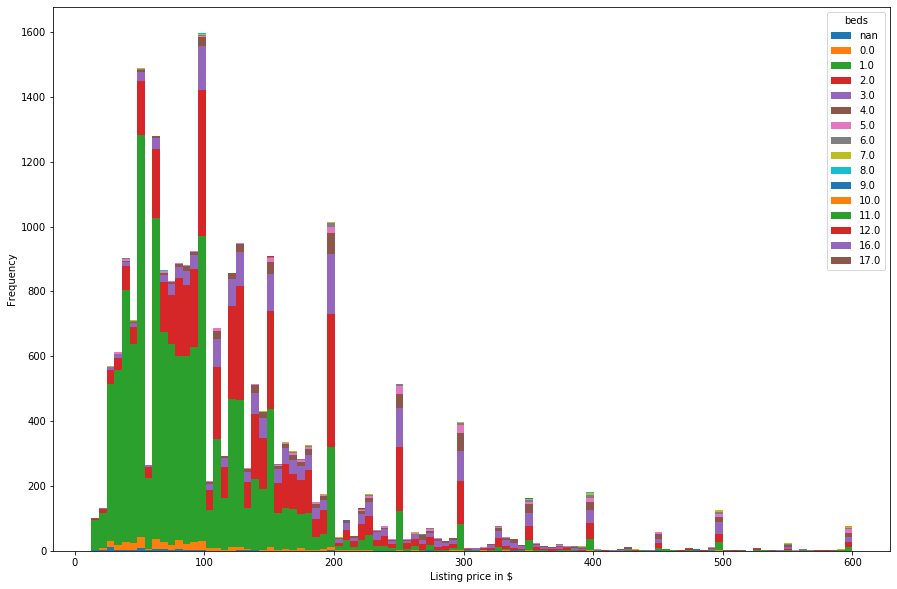

In [127]:
listings.loc[(listings.price <= 600) & (listings.price > 0)].pivot(columns = 'beds',values = 'price').plot.hist(stacked = True,bins=100)
plt.xlabel('Listing price in $');

Vast majority of the listings have one bed, the one-bed listing prices have a very wide range. There are listings that have no bed.

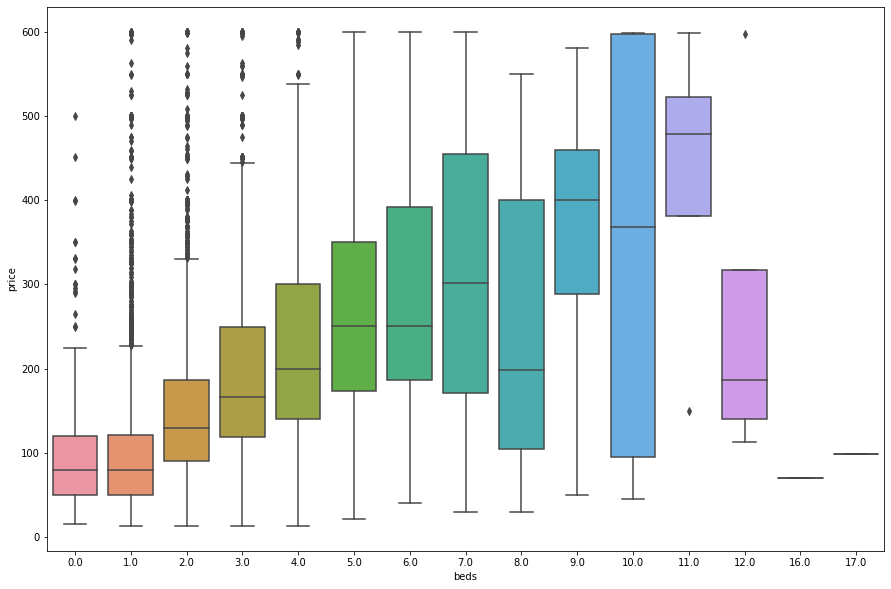

In [128]:
sns.boxplot(y='price', x='beds', data = listings.loc[(listings.price <= 600) & (listings.price > 0)])
plt.show();

Interesting to discover that the median price for no bed listings is higher than 1-bed and 2-bed listings, and median price for 10-bed listings is very low.

#### numeric features

We select several numeric features and try to explore them all together.

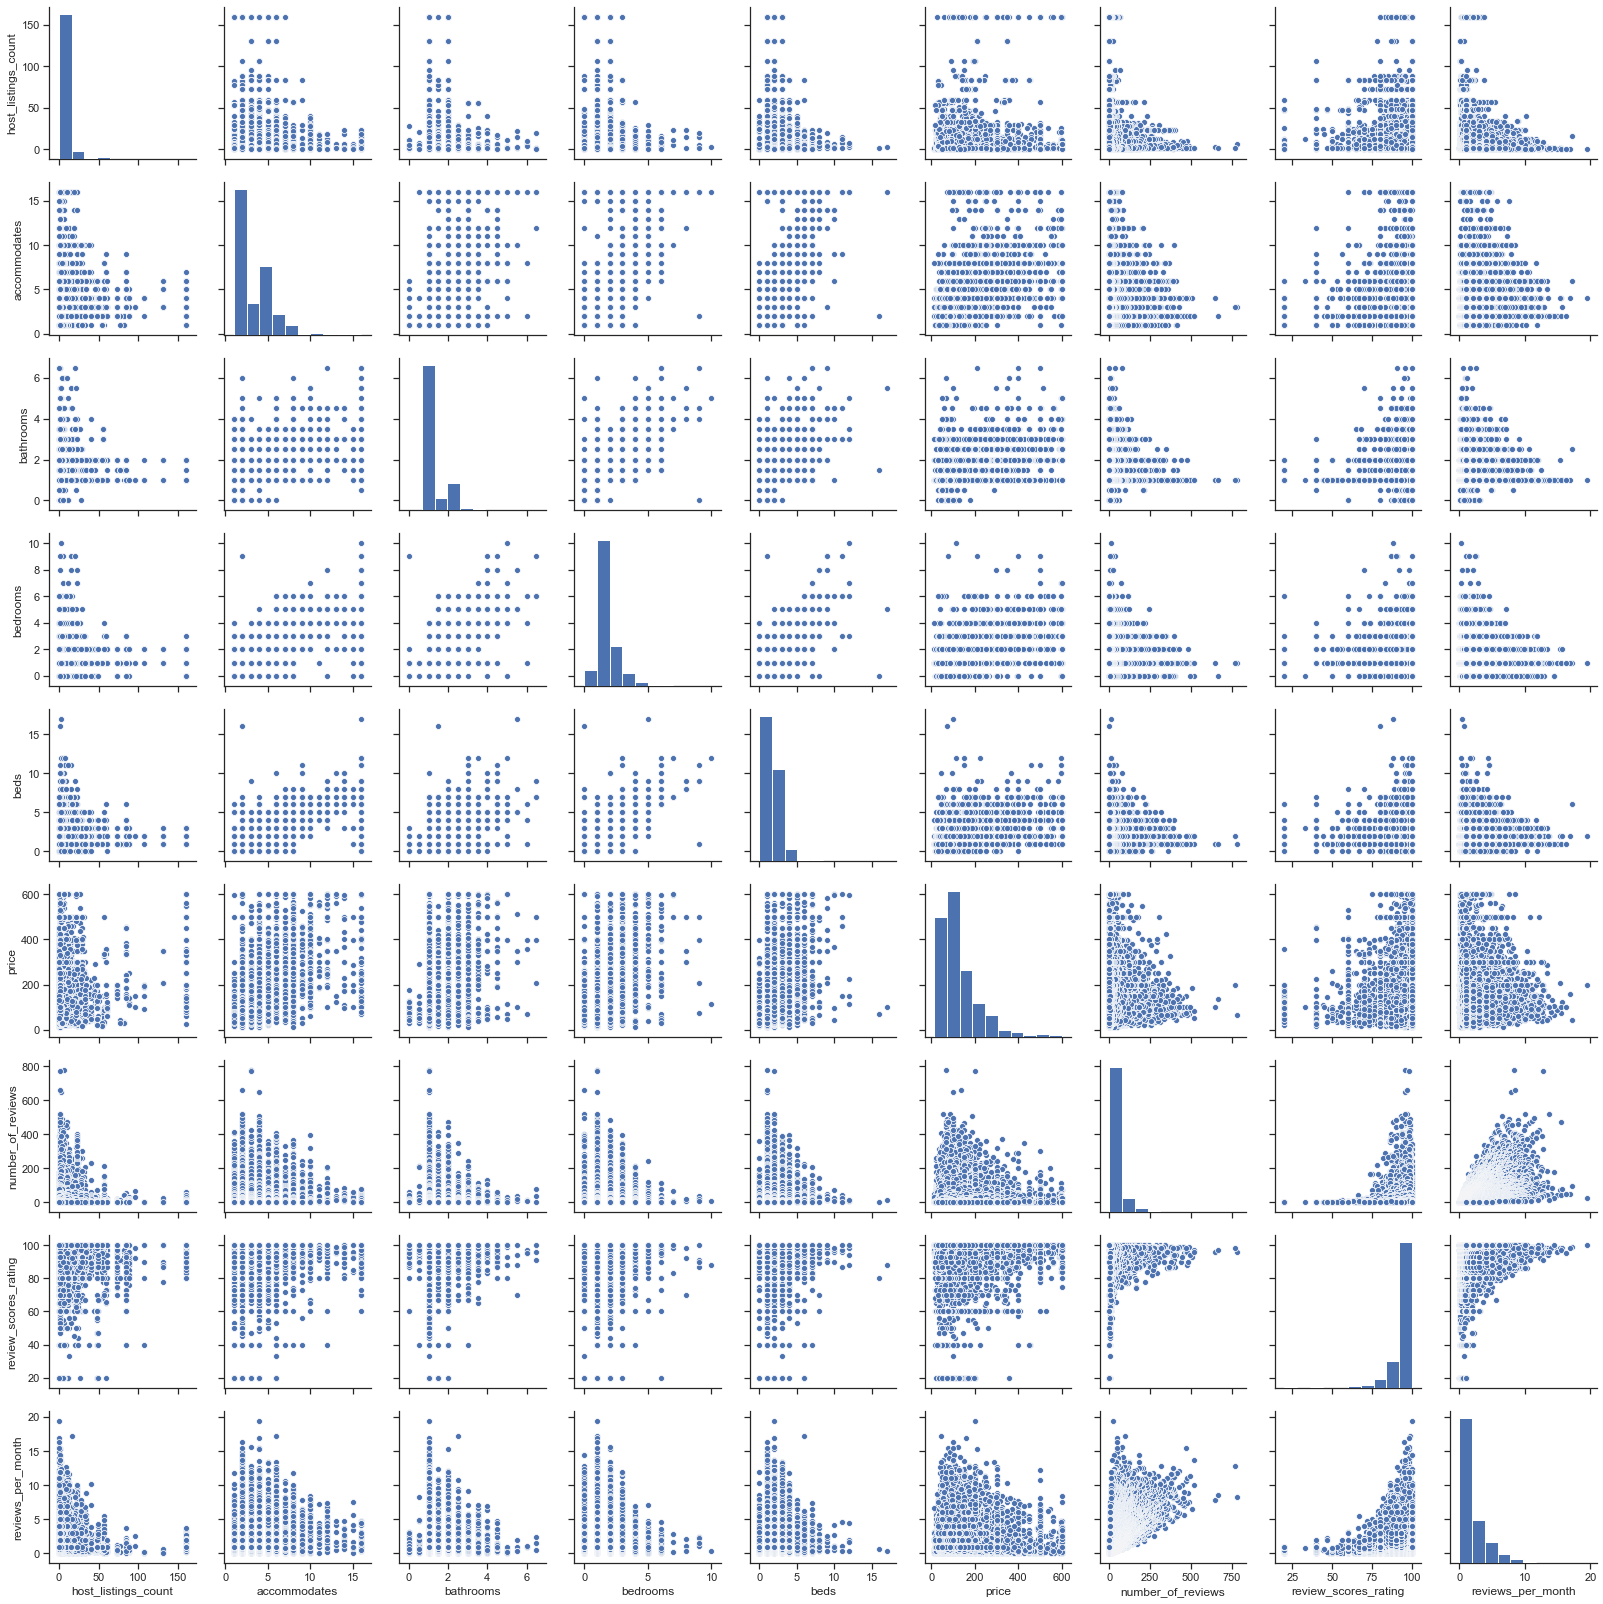

In [129]:
col = ['host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month']
sns.set(style="ticks", color_codes=True)
sns.pairplot(listings.loc[(listings.price <= 600) & (listings.price > 0)][col].dropna())
plt.show();

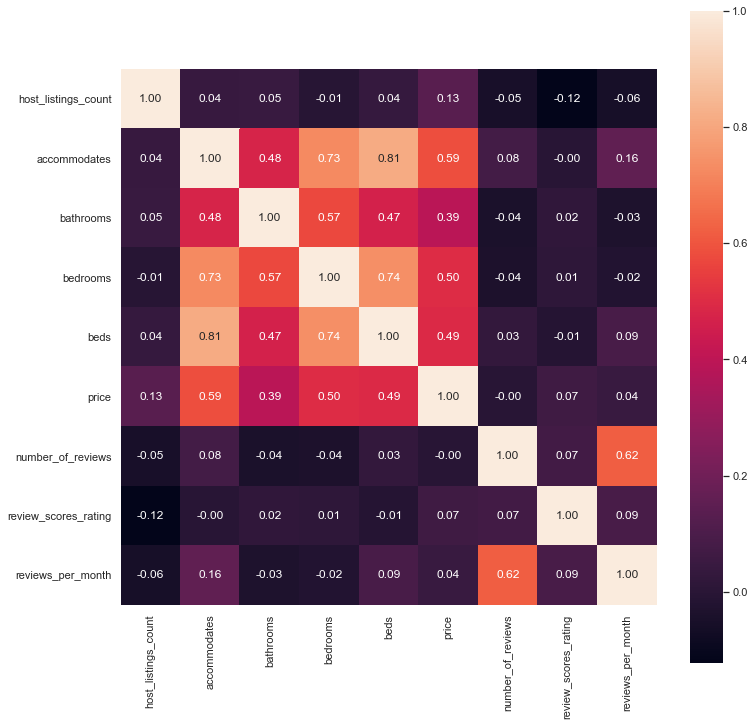

In [131]:
corr = listings.loc[(listings.price <= 600) & (listings.price > 0)][col].dropna().corr()
plt.figure(figsize = (12,12))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f', xticklabels=col, yticklabels=col)
plt.show();

There are some not bad news such as number of bedrooms and accommodates seem to be correlated with price.

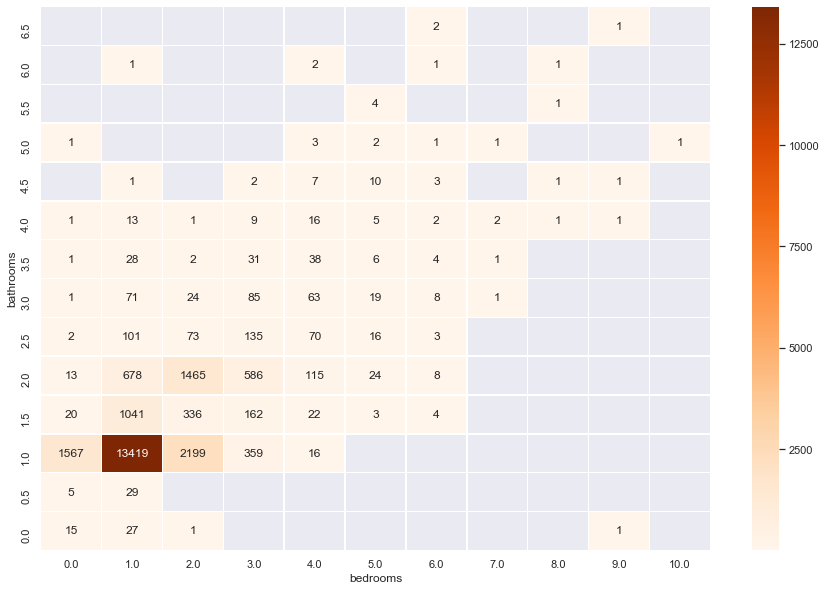

In [132]:
sns.heatmap(listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                .groupby(['bathrooms', 'bedrooms'])\
                .count()['price']\
                .reset_index()\
                .pivot('bathrooms', 'bedrooms', 'price')\
                .sort_index(ascending=False),
            cmap="Oranges", fmt='.0f', annot=True, linewidths=0.5)
plt.show();

Vast majority of listings have one bedroom and 1 bathroom.

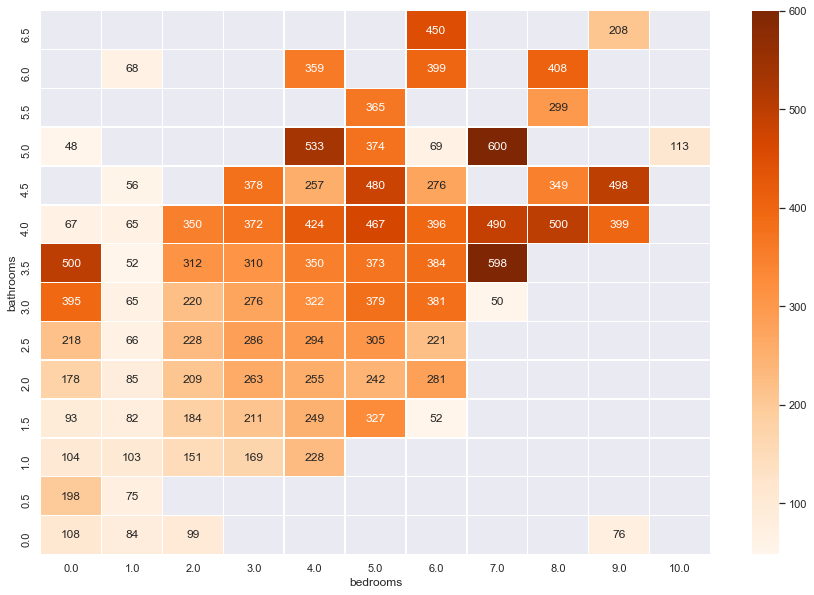

In [133]:
sns.heatmap(listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                .groupby(['bathrooms', 'bedrooms'])\
                .mean()['price']\
                .reset_index()\
                .pivot('bathrooms', 'bedrooms', 'price')\
                .sort_index(ascending=False),
            cmap="Oranges", fmt='.0f', annot=True, linewidths=0.5)
plt.show();

It looks like listings with 6 bedrooms and 4 bathrooms have the highest median price. But we must be skeptical about this finding because from the above single graph, we don't know how many listings in this category.